In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing standard modules
import numpy as np
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing data from the file
data = pd.read_csv('frogs_mfcc.csv')

In [4]:
#checking the head of the variable, data
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,AdenomeraAndre


In [5]:
#checking the shape of the variable, data
data.shape

(7195, 23)

<AxesSubplot:>

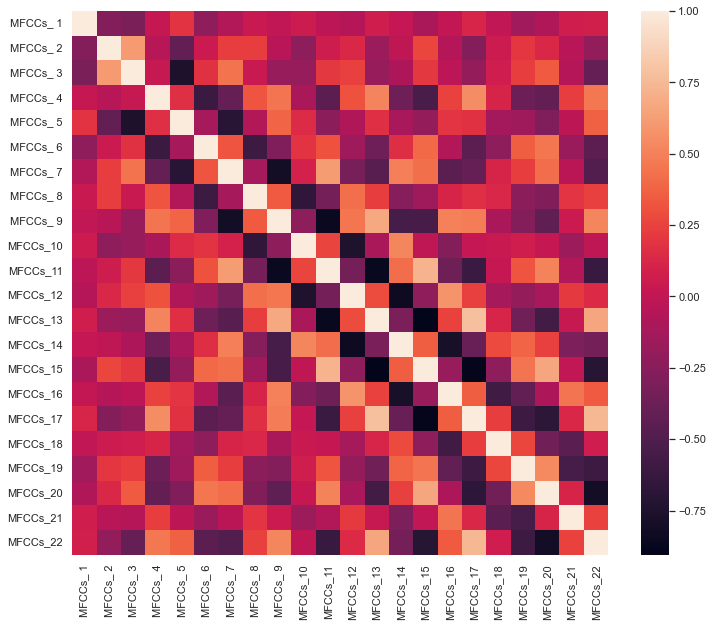

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

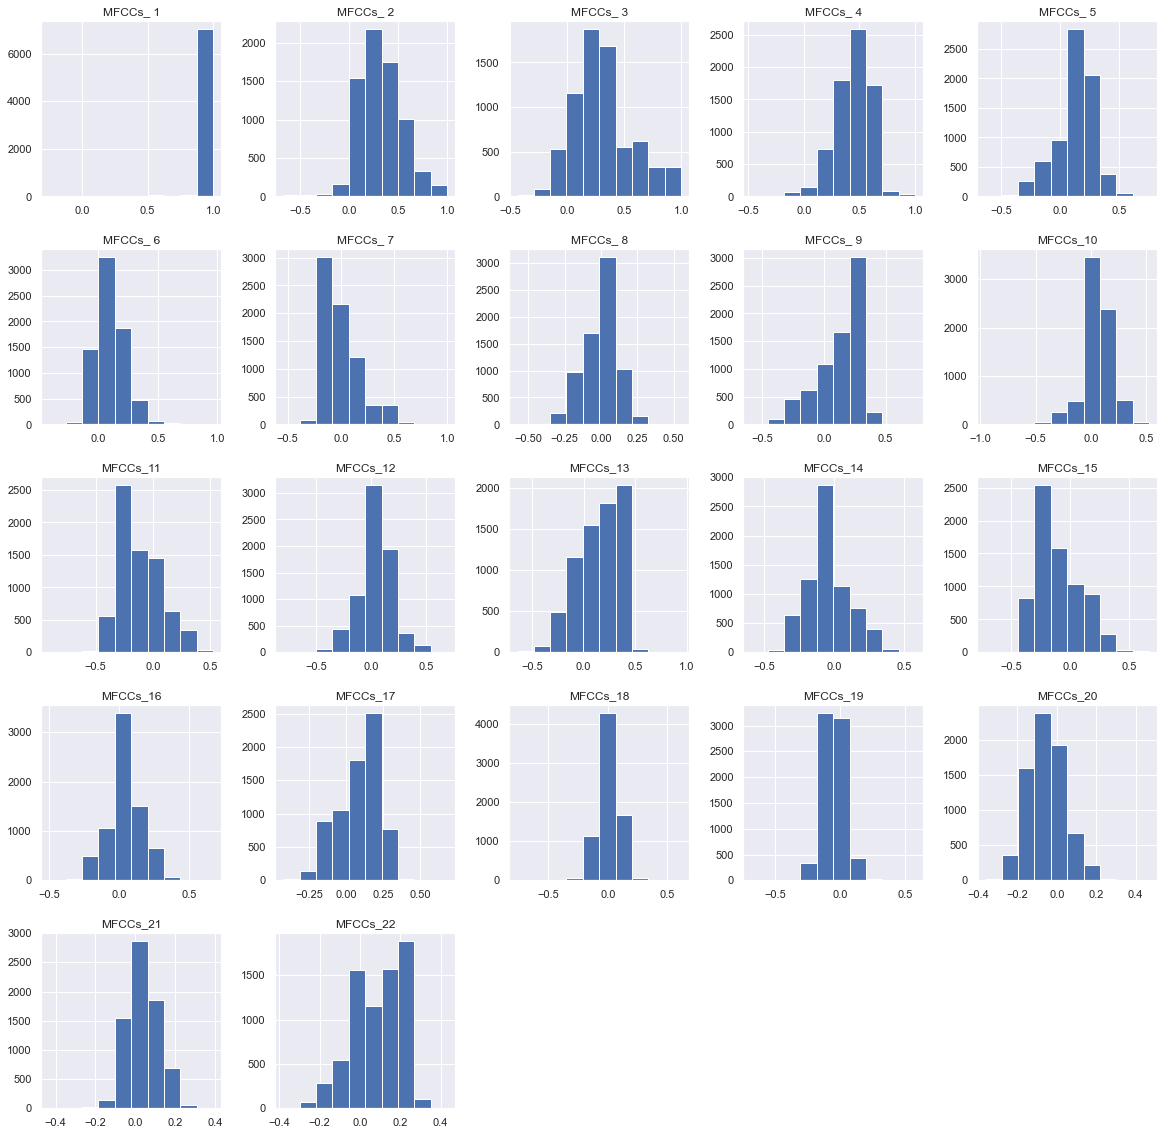

In [7]:
from matplotlib import pyplot as plt
data.hist(figsize=(20,20))
plt.show()

In [8]:
#checking if there are any null valus in the dataset
data.isnull().sum()

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Species     0
dtype: int64

In [9]:
#checking if there are any missing values in a row
data[data.isnull().any(axis=1)]

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species


In [10]:
#splitting the dataframe into X and y
X = data.iloc[:,0:22]
y = data.iloc[:,-1]

In [11]:
X.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [12]:
y.head()

0    AdenomeraAndre
1    AdenomeraAndre
2    AdenomeraAndre
3    AdenomeraAndre
4    AdenomeraAndre
Name: Species, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
forward_feature_selection = SequentialFeatureSelector(SGDClassifier(),
                                                     k_features = 10,
                                                     forward = True,
                                                     floating = False,
                                                     verbose = 2,
                                                     scoring = "accuracy",
                                                     cv=5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    6.0s finished

[2022-07-17 18:41:39] Features: 1/10 -- score: 0.6219561492422049[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    5.5s finished

[2022-07-17 18:41:44] Features: 2/10 -- score: 0.7324497417704412[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.4s finished

[2022-07-17 18:41:50] Features: 3/10 -- score: 0.7868325550246162[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [16]:
#checking the index of the feature that have the highest score
forward_feature_selection.k_feature_idx_

(1, 2, 4, 5, 8, 11, 12, 15, 20, 21)

In [17]:
#checking the names of the features with the highest score
forward_feature_selection.k_feature_names_

('MFCCs_ 2',
 'MFCCs_ 3',
 'MFCCs_ 5',
 'MFCCs_ 6',
 'MFCCs_ 9',
 'MFCCs_12',
 'MFCCs_13',
 'MFCCs_16',
 'MFCCs_21',
 'MFCCs_22')

In [18]:
#checking the accuracy
forward_feature_selection.k_score_

0.919390445506323

In [19]:
#converting the forward feature selection results into a dataframe
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict())

,1,2,3,4,5,6,7,8,9,10
feature_idx,"(21,)","(12, 21)","(11, 12, 21)","(11, 12, 20, 21)","(5, 11, 12, 20, 21)","(2, 5, 11, 12, 20, 21)","(1, 2, 5, 11, 12, 20, 21)","(1, 2, 5, 11, 12, 15, 20, 21)","(1, 2, 4, 5, 11, 12, 15, 20, 21)","(1, 2, 4, 5, 8, 11, 12, 15, 20, 21)"
cv_scores,"[0.6423611111111112, 0.5873153779322329, 0.637...","[0.7517361111111112, 0.6377063423110338, 0.751...","[0.7786458333333334, 0.7749782797567333, 0.801...","[0.8229166666666666, 0.8366637706342311, 0.842...","[0.8480902777777778, 0.8531711555169418, 0.847...","[0.8697916666666666, 0.8922675933970461, 0.831...","[0.8940972222222222, 0.895742832319722, 0.8983...","[0.9088541666666666, 0.9079061685490878, 0.911...","[0.921875, 0.9113814074717637, 0.9218071242397...","[0.9079861111111112, 0.9218071242397915, 0.917..."
avg_score,0.621956,0.73245,0.786833,0.812368,0.851634,0.871786,0.895761,0.90827,0.917129,0.91939
feature_names,"(MFCCs_22,)","(MFCCs_13, MFCCs_22)","(MFCCs_12, MFCCs_13, MFCCs_22)","(MFCCs_12, MFCCs_13, MFCCs_21, MFCCs_22)","(MFCCs_ 6, MFCCs_12, MFCCs_13, MFCCs_21, MFCCs...","(MFCCs_ 3, MFCCs_ 6, MFCCs_12, MFCCs_13, MFCCs...","(MFCCs_ 2, MFCCs_ 3, MFCCs_ 6, MFCCs_12, MFCCs...","(MFCCs_ 2, MFCCs_ 3, MFCCs_ 6, MFCCs_12, MFCCs...","(MFCCs_ 2, MFCCs_ 3, MFCCs_ 5, MFCCs_ 6, MFCCs...","(MFCCs_ 2, MFCCs_ 3, MFCCs_ 5, MFCCs_ 6, MFCCs..."
ci_bound,0.029288,0.061116,0.014239,0.060404,0.003981,0.027826,0.005596,0.005125,0.00538,0.010991
std_dev,0.022787,0.04755,0.011079,0.046997,0.003097,0.021649,0.004354,0.003987,0.004186,0.008551
std_err,0.011393,0.023775,0.005539,0.023498,0.001549,0.010825,0.002177,0.001994,0.002093,0.004276


In [20]:
X = X[['MFCCs_ 3','MFCCs_ 7','MFCCs_ 9','MFCCs_10','MFCCs_11','MFCCs_12',
                 'MFCCs_15','MFCCs_17','MFCCs_18','MFCCs_22']]
X_train = X_train[['MFCCs_ 3','MFCCs_ 7','MFCCs_ 9','MFCCs_10','MFCCs_11','MFCCs_12',
                 'MFCCs_15','MFCCs_17','MFCCs_18','MFCCs_22']]
X_test = X_test[['MFCCs_ 3','MFCCs_ 7','MFCCs_ 9','MFCCs_10','MFCCs_11','MFCCs_12',
                 'MFCCs_15','MFCCs_17','MFCCs_18','MFCCs_22']]

In [21]:
from sklearn.linear_model import LogisticRegression
model_mlogr = LogisticRegression(multi_class='multinomial', max_iter=200)
model_mlogr.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

# Calculations of accuracy score, confusion matrix, precision and f-1 score

In [22]:
#accuracy score, confusion matrix, accuracy, recall, precision and f1-score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model_mlogr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9027102154273802
[[124   0  12   0   0   1   0   2   0   0]
 [  0 694   1   0   0   1   0   0   0   0]
 [  1   0  93   1   0   0   0   0   0   0]
 [ 11  12  10  28   0   7   0   0   0   0]
 [  2   0   0   0  94   1   0   1   0   0]
 [  0   2   0   0   3 218   1   2   0   0]
 [  3   0   0   1   0   9  40   0   0   0]
 [  0   0   0   0   6  13   1   0   0   0]
 [  0   0   0   0   0  13   0   0   0   0]
 [  0   0   2   2   2  16   0   1   0   8]]
                        precision    recall  f1-score   support

        AdenomeraAndre       0.88      0.89      0.89       139
AdenomeraHylaedactylus       0.98      1.00      0.99       696
    Ameeregatrivittata       0.79      0.98      0.87        95
            HylaMinuta       0.88      0.41      0.56        68
  HypsiboasCinerascens       0.90      0.96      0.93        98
     HypsiboasCordobae       0.78      0.96      0.86       226
   LeptodactylusFuscus       0.95      0.75      0.84        53
 OsteocephalusOophagus       0.00    

In [23]:
y_pred_prob = model_mlogr.predict_proba(X_test)
print(y_pred_prob[0:5,:])

[[1.07590652e-03 7.38031202e-02 6.29847552e-03 3.08249903e-03
  2.00300502e-01 3.02638768e-01 2.41438474e-02 5.62011528e-02
  1.36167364e-02 3.18838992e-01]
 [2.96779378e-03 1.34942131e-03 5.95438580e-02 8.23268300e-01
  1.60118980e-03 3.43071285e-02 6.92920077e-02 1.23516662e-03
  2.06254212e-03 4.37259201e-03]
 [1.54594204e-05 9.42607588e-01 4.42935499e-04 4.82087135e-03
  6.83188202e-05 4.69597332e-02 8.36109596e-04 5.45730612e-05
  2.02894853e-04 3.99151600e-03]
 [1.67759387e-06 9.54950396e-01 9.26066806e-06 2.15195837e-04
  3.27246589e-05 4.34269270e-02 5.35060046e-04 2.60178387e-05
  5.52079979e-05 7.47532731e-04]
 [8.66556953e-04 2.20138124e-04 6.65424218e-04 4.14961270e-05
  8.36616628e-01 2.59755225e-02 6.21584980e-02 6.38840329e-02
  6.69929493e-03 2.87240843e-03]]


# Target variable (Expected vs Predicted)

In [25]:
pred = model_mlogr.predict(X_test)

In [26]:
output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = pred
print(output.to_string())

             Expected Output        Predicted Output
7065             ScinaxRuber             ScinaxRuber
4872              HylaMinuta              HylaMinuta
4034  AdenomeraHylaedactylus  AdenomeraHylaedactylus
1281  AdenomeraHylaedactylus  AdenomeraHylaedactylus
5320    HypsiboasCinerascens    HypsiboasCinerascens
5745       HypsiboasCordobae       HypsiboasCordobae
454           AdenomeraAndre          AdenomeraAndre
1014      Ameeregatrivittata      Ameeregatrivittata
3457  AdenomeraHylaedactylus  AdenomeraHylaedactylus
451           AdenomeraAndre          AdenomeraAndre
5094    HypsiboasCinerascens    HypsiboasCinerascens
296           AdenomeraAndre      Ameeregatrivittata
1702  AdenomeraHylaedactylus  AdenomeraHylaedactylus
3930  AdenomeraHylaedactylus  AdenomeraHylaedactylus
4539  AdenomeraHylaedactylus  AdenomeraHylaedactylus
4676  AdenomeraHylaedactylus  AdenomeraHylaedactylus
5947       HypsiboasCordobae       HypsiboasCordobae
2709  AdenomeraHylaedactylus  AdenomeraHylaeda